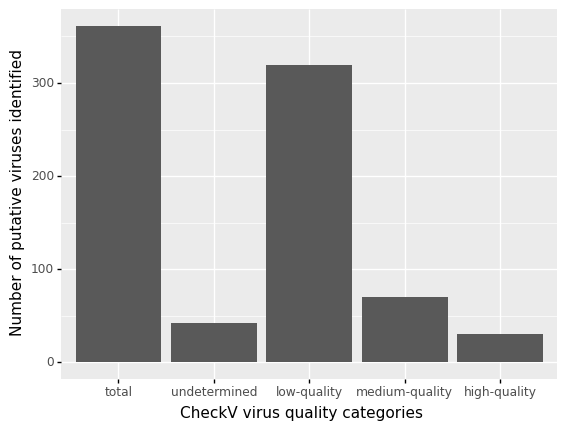

<ggplot: (8766832863251)>

In [13]:
import pandas as pd
from plotnine import *

virus_quality = pd.read_csv(
    str(snakemake.input)
    # '/home/carsonjm/CarsonJM/phide_piper/results/06_VIRUS_QUALITY/01_checkv/quality_summary.tsv'
    , sep='\t')

virus_quality.loc[virus_quality['completeness'] > 90, 'high-quality'] = True
virus_quality.loc[virus_quality['completeness'] > 50, 'medium-quality'] = True
virus_quality.loc[virus_quality['completeness'].notnull(), 'low-quality'] = True
virus_quality.loc[virus_quality['completeness'].isnull(), 'undetermined'] = True
virus_quality.loc[(virus_quality['completeness'].isnull() | virus_quality['completeness'].notnull()), 'total'] = True
 
vq_melt_qual = virus_quality.melt(id_vars='contig_id', value_vars=['high-quality', 'medium-quality', 'low-quality', 'undetermined', 'total'])
vq_melt_qual2 = vq_melt_qual[vq_melt_qual['value'] == True]
vq_grp_qual_rn = vq_melt_qual2.rename(columns={'variable':'quality'})
vq_grp_qual_rn['quality'] = pd.Categorical(vq_grp_qual_rn['quality'], categories=['total', 'undetermined', 'low-quality', 'medium-quality', 'high-quality'], ordered = True)

vq_plot = (
    ggplot(vq_grp_qual_rn)
    + geom_bar(aes(x='quality'))
    + ylab("Number of putative viruses identified")
    + xlab("CheckV virus quality categories")
)

vq_plot.save(str(snakemake.output), dpi=600)